In [1]:
# Needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv("cleandf.csv")
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,MathResult,ReadingResult,WritingResult
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,Pass,Pass,Pass
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,Fail,Pass,Pass
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42,Fail,Fail,Fail
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,Pass,Pass,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,Fail,Fail,Fail
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,Fail,Fail,Fail
30638,female,group C,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67,Fail,Pass,Fail
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,Pass,Pass,Pass


## Understanding Data

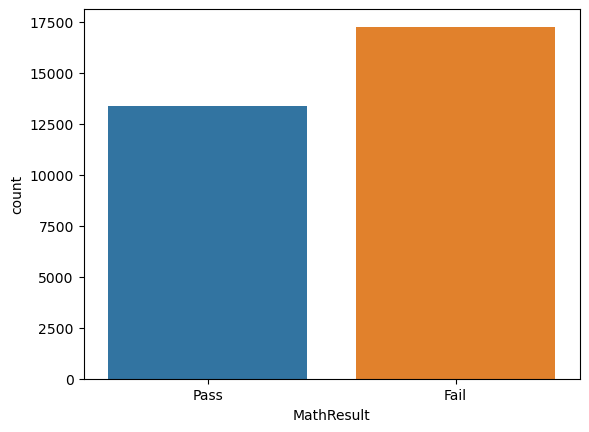

In [3]:
sns.countplot(x= "MathResult",data=df);

## Cleaning Dataset

In [4]:
df_dummy = pd.get_dummies(df, columns=['Gender', 'LunchType', 'TestPrep', 'IsFirstChild','TransportMeans'],
                          drop_first=True)
df_dummy.head()

,EthnicGroup,ParentEduc,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,MathResult,ReadingResult,WritingResult,Gender_male,LunchType_standard,TestPrep_none,IsFirstChild_yes,TransportMeans_school_bus
0,group C,bachelor's degree,married,regularly,3.0,< 5,71,71,74,Pass,Pass,Pass,0,1,1,1,1
1,group C,some college,married,sometimes,0.0,5 - 10,69,90,88,Fail,Pass,Pass,0,1,1,1,1
2,group B,master's degree,single,sometimes,4.0,< 5,87,93,91,Pass,Pass,Pass,0,1,1,1,1
3,group A,associate's degree,married,never,1.0,5 - 10,45,56,42,Fail,Fail,Fail,1,0,1,0,1
4,group C,some college,married,sometimes,0.0,5 - 10,76,78,75,Pass,Pass,Pass,1,1,1,1,1


In [5]:
df_dummy["WklyStudyHours"] = [1 if x == '> 10' else 0 for x in df_dummy["WklyStudyHours"]]
df_dummy.WklyStudyHours.unique()

array([0, 1])

In [6]:
df_dummy["PracticeSport"] = [0 if x == 'never' else 1 for x in df_dummy["PracticeSport"]]
df_dummy.PracticeSport.unique()

array([1, 0])

In [7]:
math_df = df_dummy.drop(["ReadingResult", "WritingResult", "MathScore"], axis = 1)
math_df

,EthnicGroup,ParentEduc,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,ReadingScore,WritingScore,MathResult,Gender_male,LunchType_standard,TestPrep_none,IsFirstChild_yes,TransportMeans_school_bus
0,group C,bachelor's degree,married,1,3.0,0,71,74,Pass,0,1,1,1,1
1,group C,some college,married,1,0.0,0,90,88,Fail,0,1,1,1,1
2,group B,master's degree,single,1,4.0,0,93,91,Pass,0,1,1,1,1
3,group A,associate's degree,married,0,1.0,0,56,42,Fail,1,0,1,0,1
4,group C,some college,married,1,0.0,0,78,75,Pass,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,group D,high school,single,1,2.0,0,61,65,Fail,0,1,1,0,1
30637,group E,high school,single,1,1.0,0,53,51,Fail,1,1,1,0,0
30638,group C,high school,married,1,1.0,0,70,67,Fail,0,0,0,0,0
30639,group D,associate's degree,married,1,3.0,0,90,93,Pass,0,1,0,0,1


In [8]:
math_df["MathResult"] = [0 if x == 'Fail' else 1 for x in math_df["MathResult"]]
math_df["MathResult"].unique()

array([1, 0])

In [9]:
math_df.head()

,EthnicGroup,ParentEduc,ParentMaritalStatus,PracticeSport,NrSiblings,WklyStudyHours,ReadingScore,WritingScore,MathResult,Gender_male,LunchType_standard,TestPrep_none,IsFirstChild_yes,TransportMeans_school_bus
0,group C,bachelor's degree,married,1,3.0,0,71,74,1,0,1,1,1,1
1,group C,some college,married,1,0.0,0,90,88,0,0,1,1,1,1
2,group B,master's degree,single,1,4.0,0,93,91,1,0,1,1,1,1
3,group A,associate's degree,married,0,1.0,0,56,42,0,1,0,1,0,1
4,group C,some college,married,1,0.0,0,78,75,1,1,1,1,1,1


## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = math_df.drop(["EthnicGroup", "ParentEduc", "ParentMaritalStatus", "MathResult", "NrSiblings"], axis = 1)
y = math_df[["MathResult"]]

#split the dataset into training (80%) and testing (20%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

X_train2 = X_train

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#instantiate the model
log_regression = LogisticRegression(random_state=42)

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
from sklearn import metrics

cm1 = metrics.confusion_matrix(y_test, y_pred)
print(cm1)

[[3092  370]
 [ 380 2287]]


In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8776309348996574


In [28]:
from sklearn.metrics import classification_report
 
logistic_report = classification_report(y_test, y_pred)
print(logistic_report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3462
           1       0.86      0.86      0.86      2667

    accuracy                           0.88      6129
   macro avg       0.88      0.88      0.88      6129
weighted avg       0.88      0.88      0.88      6129



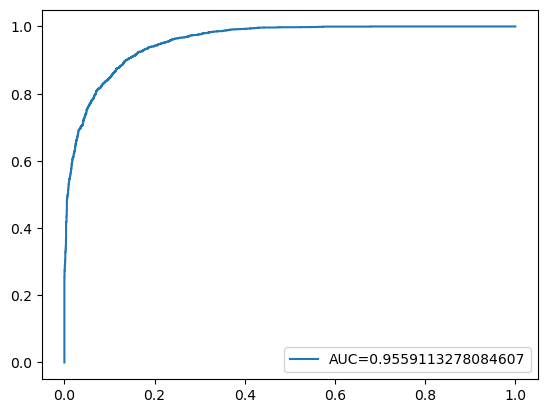

In [14]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

## SVM

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

a = GridSearchCV(estimator=SVC(random_state =42),
                 param_grid={"kernel" : ["linear", 'rbf'],
                             "gamma" : ["auto"],
                             "C" : [0.01,0.1]},
                verbose = 10)
a.fit(X_train,y_train)

print('Best kernel:', a.best_estimator_.get_params()['kernel'])
print('Best gamma:', a.best_estimator_.get_params()['gamma'])
print('Best C:', a.best_estimator_.get_params()['C'])

/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START C=0.01, gamma=auto, kernel=linear...........................
[CV 1/5; 1/4] END C=0.01, gamma=auto, kernel=linear;, score=0.877 total time=   4.2s
[CV 2/5; 1/4] START C=0.01, gamma=auto, kernel=linear...........................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 1/4] END C=0.01, gamma=auto, kernel=linear;, score=0.880 total time=   4.1s
[CV 3/5; 1/4] START C=0.01, gamma=auto, kernel=linear...........................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 1/4] END C=0.01, gamma=auto, kernel=linear;, score=0.877 total time=   4.1s
[CV 4/5; 1/4] START C=0.01, gamma=auto, kernel=linear...........................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 1/4] END C=0.01, gamma=auto, kernel=linear;, score=0.881 total time=   4.1s
[CV 5/5; 1/4] START C=0.01, gamma=auto, kernel=linear...........................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 1/4] END C=0.01, gamma=auto, kernel=linear;, score=0.881 total time=   4.1s
[CV 1/5; 2/4] START C=0.01, gamma=auto, kernel=rbf..............................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 2/4] END C=0.01, gamma=auto, kernel=rbf;, score=0.871 total time=  11.4s
[CV 2/5; 2/4] START C=0.01, gamma=auto, kernel=rbf..............................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 2/4] END C=0.01, gamma=auto, kernel=rbf;, score=0.878 total time=  11.5s
[CV 3/5; 2/4] START C=0.01, gamma=auto, kernel=rbf..............................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 2/4] END C=0.01, gamma=auto, kernel=rbf;, score=0.867 total time=  11.1s
[CV 4/5; 2/4] START C=0.01, gamma=auto, kernel=rbf..............................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 2/4] END C=0.01, gamma=auto, kernel=rbf;, score=0.873 total time=  11.2s
[CV 5/5; 2/4] START C=0.01, gamma=auto, kernel=rbf..............................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 2/4] END C=0.01, gamma=auto, kernel=rbf;, score=0.876 total time=  11.3s
[CV 1/5; 3/4] START C=0.1, gamma=auto, kernel=linear............................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 3/4] END C=0.1, gamma=auto, kernel=linear;, score=0.877 total time=   3.9s
[CV 2/5; 3/4] START C=0.1, gamma=auto, kernel=linear............................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 3/4] END C=0.1, gamma=auto, kernel=linear;, score=0.882 total time=   3.9s
[CV 3/5; 3/4] START C=0.1, gamma=auto, kernel=linear............................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 3/4] END C=0.1, gamma=auto, kernel=linear;, score=0.878 total time=   3.9s
[CV 4/5; 3/4] START C=0.1, gamma=auto, kernel=linear............................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 3/4] END C=0.1, gamma=auto, kernel=linear;, score=0.879 total time=   3.9s
[CV 5/5; 3/4] START C=0.1, gamma=auto, kernel=linear............................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 3/4] END C=0.1, gamma=auto, kernel=linear;, score=0.882 total time=   3.8s
[CV 1/5; 4/4] START C=0.1, gamma=auto, kernel=rbf...............................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 4/4] END C=0.1, gamma=auto, kernel=rbf;, score=0.873 total time=   7.8s
[CV 2/5; 4/4] START C=0.1, gamma=auto, kernel=rbf...............................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 4/4] END C=0.1, gamma=auto, kernel=rbf;, score=0.880 total time=   7.8s
[CV 3/5; 4/4] START C=0.1, gamma=auto, kernel=rbf...............................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 4/4] END C=0.1, gamma=auto, kernel=rbf;, score=0.873 total time=   7.7s
[CV 4/5; 4/4] START C=0.1, gamma=auto, kernel=rbf...............................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 4/4] END C=0.1, gamma=auto, kernel=rbf;, score=0.879 total time=   7.9s
[CV 5/5; 4/4] START C=0.1, gamma=auto, kernel=rbf...............................


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 4/4] END C=0.1, gamma=auto, kernel=rbf;, score=0.879 total time=   7.7s


/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best kernel: linear
Best gamma: auto
Best C: 0.1


In [30]:
svm = SVC(kernel = "linear", gamma = "auto", C = 0.01, probability=True, random_state=42)
svm.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = svm.predict(X_test)

cm2 = metrics.confusion_matrix(y_test, y_pred)
print(cm2)

/Users/dannychang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[3010  452]
 [ 292 2375]]


In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8786098874204601


In [18]:
svm_report = classification_report(y_test, y_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3462
           1       0.86      0.86      0.86      2667

    accuracy                           0.88      6129
   macro avg       0.88      0.88      0.88      6129
weighted avg       0.88      0.88      0.88      6129



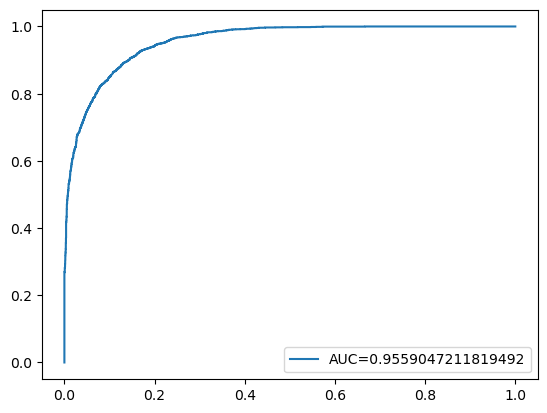

In [19]:
#define metrics
y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

## Comparisons

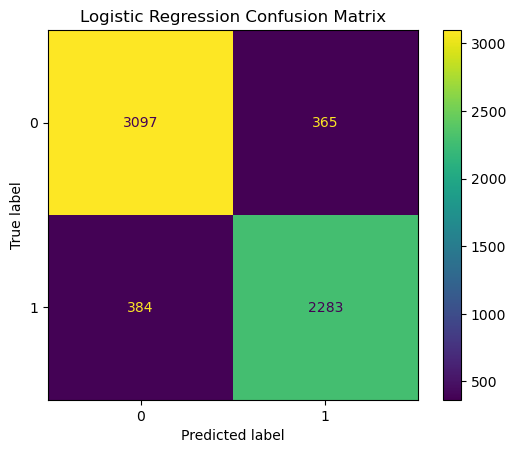

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=log_regression.classes_)
disp.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [21]:
print(logistic_report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3462
           1       0.86      0.86      0.86      2667

    accuracy                           0.88      6129
   macro avg       0.88      0.88      0.88      6129
weighted avg       0.88      0.88      0.88      6129



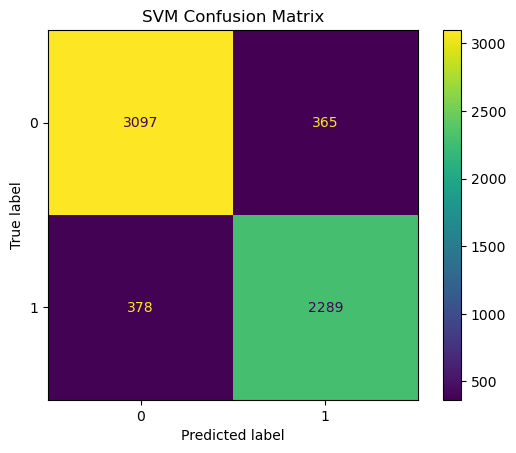

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=log_regression.classes_)
disp.plot()
plt.title("SVM Confusion Matrix")
plt.show()

In [23]:
print(svm_report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3462
           1       0.86      0.86      0.86      2667

    accuracy                           0.88      6129
   macro avg       0.88      0.88      0.88      6129
weighted avg       0.88      0.88      0.88      6129



## Weights and Interpretation

In [29]:
feature_names = X_train2.columns.tolist()
coefficients = log_regression.coef_

for i, feature_name in enumerate(feature_names):
    coefficient = coefficients[0][i]
    print(f"Feature: {feature_name} >>> Coefficient: {coefficient} \n")

Feature: PracticeSport >>> Coefficient: 0.13250569345841784 

Feature: WklyStudyHours >>> Coefficient: 0.15541370197076304 

Feature: ReadingScore >>> Coefficient: 1.1812071586934965 

Feature: WritingScore >>> Coefficient: 3.1505040042232735 

Feature: Gender_male >>> Coefficient: 1.9503675598580805 

Feature: LunchType_standard >>> Coefficient: 0.5210925977403913 

Feature: TestPrep_none >>> Coefficient: 0.5071950173687029 

Feature: IsFirstChild_yes >>> Coefficient: 0.0003271933216874701 

Feature: TransportMeans_school_bus >>> Coefficient: 0.013131300505185187 



## Support Vector Interpretation

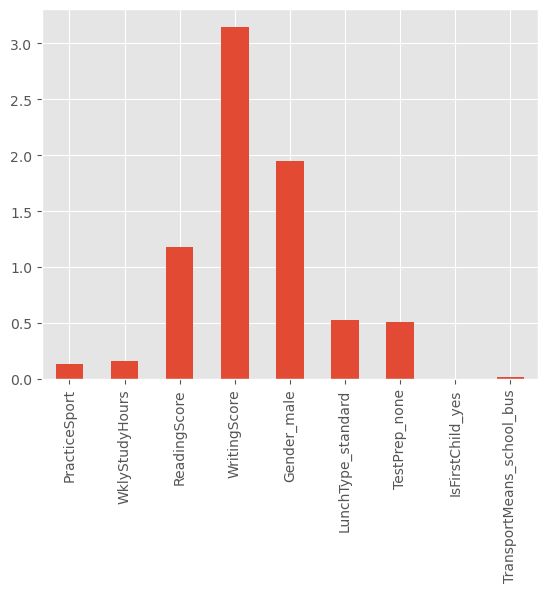

In [38]:
plt.style.use('ggplot')
coefficients = pd.Series(log_regression.coef_[0],index=feature_names)
coefficients.plot(kind='bar')
plt.show()

In [37]:
log_regression.coef_

array([[1.32505693e-01, 1.55413702e-01, 1.18120716e+00, 3.15050400e+00,
        1.95036756e+00, 5.21092598e-01, 5.07195017e-01, 3.27193322e-04,
        1.31313005e-02]])